# Correlation and Autocorrelation


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [13]:
diet = pd.read_csv('/content/diet.csv', index_col=0)
diet.head()

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72


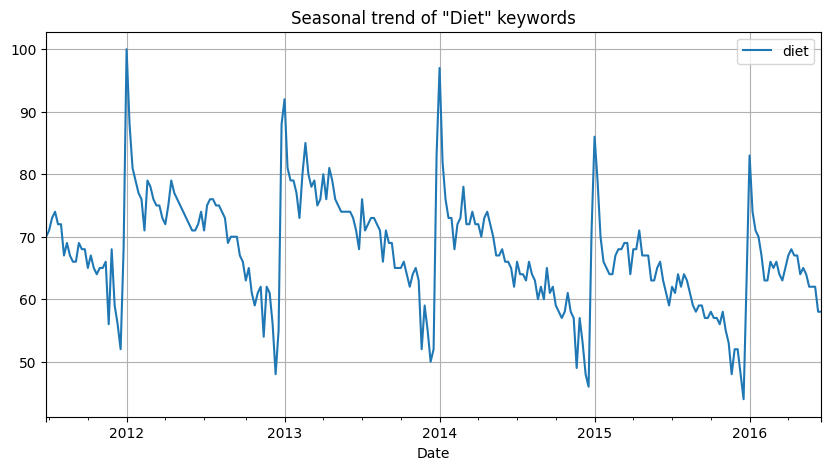

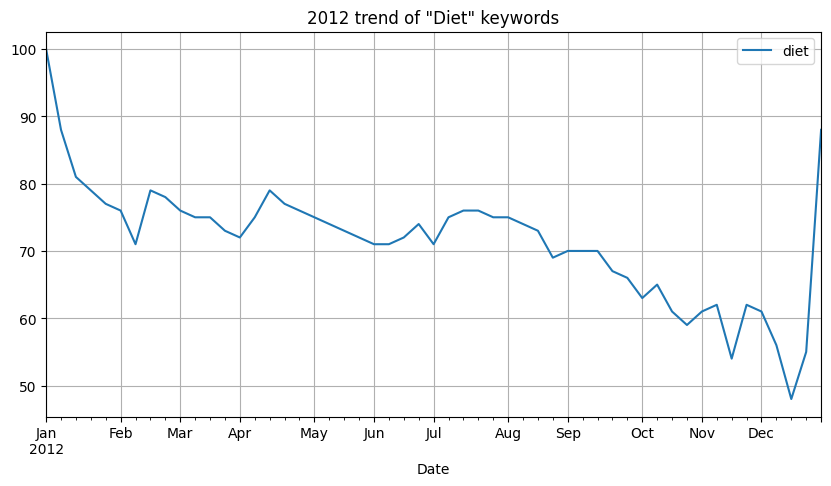

In [14]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

# Plot the entire time series diet and show gridlines
diet.plot(grid=True);
plt.title('Seasonal trend of "Diet" keywords');

# Slice the dataset to keep only 2012
diet2012 = diet[diet.index.year == 2012]

# Plot 2012 data
diet2012.plot(grid=True);
plt.title('2012 trend of "Diet" keywords');

In [15]:
stocks = pd.read_csv('/content/stocks.csv', index_col=0)
bonds = pd.read_csv('/content/bonds.csv', index_col=0)

In [16]:
stocks.index = pd.to_datetime(stocks.index)
bonds.index = pd.to_datetime(bonds.index)

In [17]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

# Merge stocks and bonds DataFrame using join()
stocks_and_bonds = stocks.join(bonds, how='inner')

{Timestamp('2013-10-14 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2007-11-12 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2010-11-11 00:00:00')}


Correlation of stocks and interest rates:  0.4119448886249272


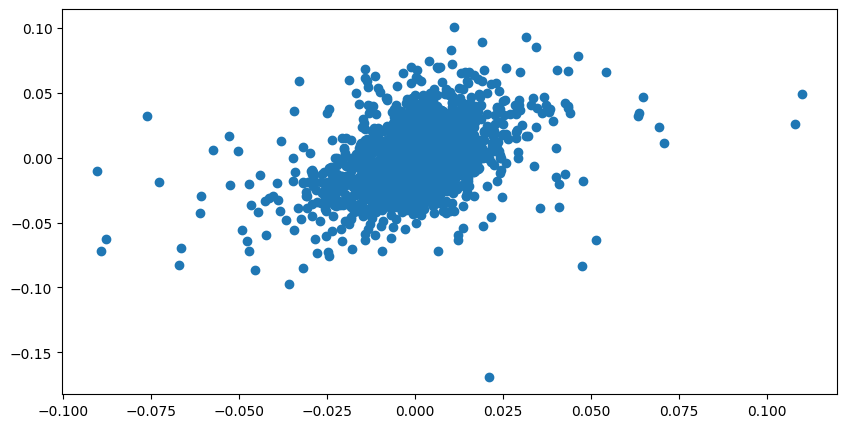

In [18]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y']);

In [19]:
DJI = pd.read_csv('/content/DJI.csv', index_col=0)
DJI.columns = ['DJI']
DJI.head()

,DJI
Date,
1941,110.96
1942,119.40
1943,135.89
1944,152.32
1945,192.91


In [20]:
UFO = pd.read_csv('/content/UFO.csv', index_col=0)
UFO.columns = ['UFO']
UFO.head()

,UFO
Date,
1941,1
1942,2
1943,9
1944,9
1945,9


In [21]:
UFO.index = pd.to_datetime(UFO.index, format="%Y")
DJI.index = pd.to_datetime(DJI.index, format="%Y")

In [22]:
levels = UFO.join(DJI, how='inner')
levels.head()

,UFO,DJI
Date,,
1941-01-01,1,110.96
1942-01-01,2,119.40
1943-01-01,9,135.89
1944-01-01,9,152.32
1945-01-01,9,192.91


Text(0, 0.5, 'Dow Jones Average/Number of Sightings')

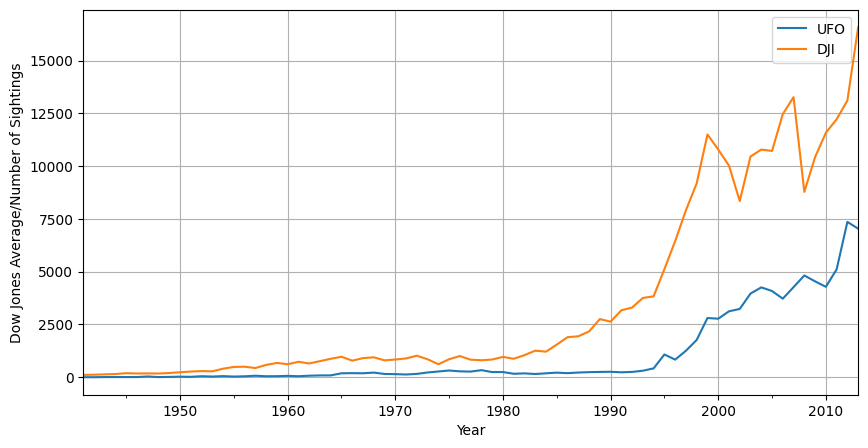

In [23]:
levels.plot(grid=True);
plt.xlabel('Year');
plt.ylabel('Dow Jones Average/Number of Sightings')

In [24]:
# Compute correlation o f levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation fo percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


In [26]:
df_x = pd.read_csv('/content/x.csv', index_col=0, header=None)
df_y = pd.read_csv('/content/y.csv', index_col=0, header=None)

df_x.columns = ['x']
df_y.columns = ['y']

x = df_x.reset_index(drop=True)['x']
y = df_y.reset_index(drop=True)['y']

In [ ]:
y

In [27]:
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" % (correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        06:29:58   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [29]:
MSFT = pd.read_csv('/content/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [30]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print('The auto correlation of weekly returns is %4.2f' % (autocorrelation))

The auto correlation of weekly returns is -0.16


In [33]:
daily_rates = pd.read_csv('/content/daily_rates.csv', index_col=0, parse_dates=['DATE'])
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [34]:
# Compute the daily change in interest rates
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22


<ipython-input-34-b252ecb3b5a0>:9: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_rates = daily_rates.resample(rule='A').last()
